In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F
import argparse
import matplotlib

from tqdm import tqdm
import glob
from PIL import Image
import os
from datetime import datetime
import time
import math
import sys
sys.path.append("../src")
from ANN import *
from visualization import *

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize(mean=(0.0,), std=(1.0,))])

mnist_dset_train = torchvision.datasets.MNIST('./data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(mnist_dset_train, batch_size=20, shuffle=True, num_workers=0)

mnist_dset_test = torchvision.datasets.MNIST('./data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(mnist_dset_test, batch_size=20, shuffle=False, num_workers=0)

In [4]:
device = "cuda"
criterion = torch.nn.MSELoss().to(device)
criterion = torch.nn.CrossEntropyLoss()
activation = F.relu
architecture = [784, 500, 10]
model = MLP(architecture, activation = activation, final_layer_activation = False).to(device)

In [5]:
evaluateClassification(model, train_loader, "cuda")

Accuracy :	 0.0772


0.0772

In [6]:
# # specify optimizer (stochastic gradient descent) and learning rate
# optimizer = torch.optim.SGD(model.parameters(),lr = 0.001, momentum = 0.0)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
trn_acc_list = []
tst_acc_list = []

n_epochs = 20
for epoch_ in range(n_epochs):
    model.train()
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        y_one_hot = F.one_hot(y, num_classes=model.nc)
        optimizer.zero_grad()
        y_hat = model(x)
        loss = criterion(y_hat,y)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
    trn_acc = evaluateClassification(model, train_loader, device, False)
    tst_acc = evaluateClassification(model, test_loader, device, False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))

3000it [00:20, 143.27it/s]
10it [00:00, 98.46it/s]

Epoch : 1, Train Accuracy : 0.9676666666666667, Test Accuracy : 0.9622


3000it [00:25, 118.76it/s]
10it [00:00, 93.92it/s]

Epoch : 2, Train Accuracy : 0.9836666666666667, Test Accuracy : 0.9737


3000it [00:26, 113.75it/s]
11it [00:00, 104.29it/s]

Epoch : 3, Train Accuracy : 0.9860166666666667, Test Accuracy : 0.9749


3000it [00:24, 120.73it/s]
11it [00:00, 105.39it/s]

Epoch : 4, Train Accuracy : 0.9921833333333333, Test Accuracy : 0.9799


3000it [00:25, 117.84it/s]
13it [00:00, 127.42it/s]

Epoch : 5, Train Accuracy : 0.9939166666666667, Test Accuracy : 0.9815


3000it [00:20, 146.92it/s]
10it [00:00, 94.11it/s]

Epoch : 6, Train Accuracy : 0.99395, Test Accuracy : 0.979


3000it [00:22, 131.45it/s]
6it [00:00, 59.42it/s]

Epoch : 7, Train Accuracy : 0.9948, Test Accuracy : 0.9801


3000it [00:25, 119.54it/s]
10it [00:00, 96.96it/s]

Epoch : 8, Train Accuracy : 0.9972, Test Accuracy : 0.9836


3000it [00:27, 107.49it/s]
10it [00:00, 96.50it/s]

Epoch : 9, Train Accuracy : 0.9964666666666666, Test Accuracy : 0.9809


3000it [00:26, 113.12it/s]
11it [00:00, 100.53it/s]

Epoch : 10, Train Accuracy : 0.9976, Test Accuracy : 0.9814


3000it [00:25, 116.82it/s]
13it [00:00, 126.50it/s]

Epoch : 11, Train Accuracy : 0.9984666666666666, Test Accuracy : 0.9847


3000it [00:26, 114.39it/s]
10it [00:00, 92.52it/s]

Epoch : 12, Train Accuracy : 0.9977166666666667, Test Accuracy : 0.979


3000it [00:29, 102.10it/s]
6it [00:00, 58.42it/s]

Epoch : 13, Train Accuracy : 0.9973333333333333, Test Accuracy : 0.9806


3000it [00:35, 85.22it/s] 
7it [00:00, 67.30it/s]

Epoch : 14, Train Accuracy : 0.9966, Test Accuracy : 0.9803


3000it [00:41, 72.28it/s]
6it [00:00, 59.63it/s]

Epoch : 15, Train Accuracy : 0.9958333333333333, Test Accuracy : 0.9779


3000it [00:39, 76.01it/s] 
6it [00:00, 58.40it/s]

Epoch : 16, Train Accuracy : 0.9985166666666667, Test Accuracy : 0.9806


3000it [00:45, 65.89it/s]
6it [00:00, 53.71it/s]

Epoch : 17, Train Accuracy : 0.99875, Test Accuracy : 0.9804


3000it [00:49, 60.13it/s]
6it [00:00, 54.86it/s]

Epoch : 18, Train Accuracy : 0.9994166666666666, Test Accuracy : 0.9806


3000it [00:50, 59.42it/s]
6it [00:00, 59.87it/s]

Epoch : 19, Train Accuracy : 0.9979, Test Accuracy : 0.9806


3000it [00:41, 71.52it/s]


Epoch : 20, Train Accuracy : 0.9975, Test Accuracy : 0.979


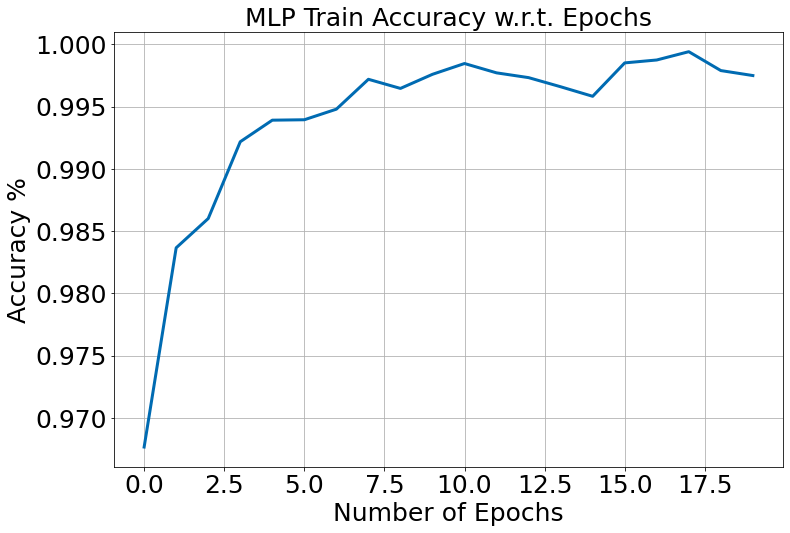

In [7]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

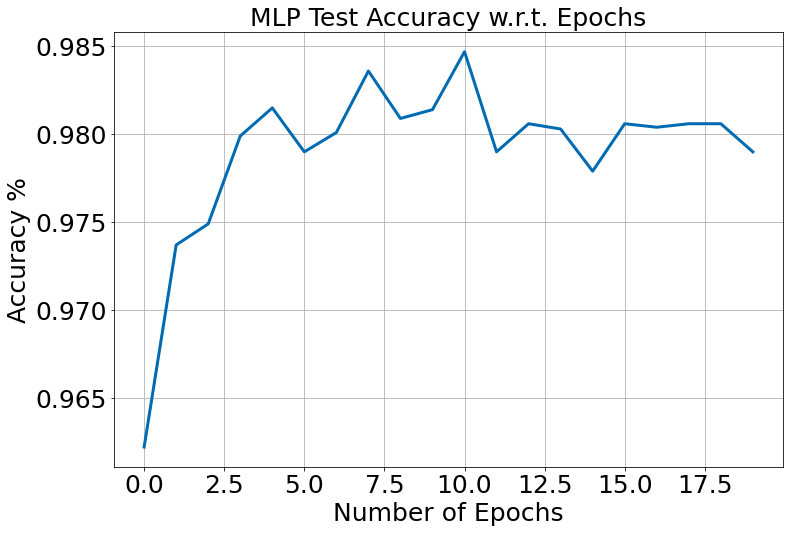

In [8]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)